Objective: Text data classification

In this assignment, you are asked to develop machine learning models that can classify Spam emails.

Write Python programs to classify the emails by Spam or non-spam category using the **Naïve Bayes**, **KNN**, and **Support Vector Machine (SVM)** and assess the classifier performance. 

# Data Preprocessing

In [1]:
# Importing the dataset
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/jasonw-at-csuf/CPSC-483-Project-3/main/emails.csv"
)

The first step we'll take to preprocess the data is to remove extraneous whitespace and to lowercase all the words

In [2]:
df.text = (
    df.text.str.replace("\W+", " ", regex=True)
    .str.replace("\s+", " ", regex=True)
    .str.strip()
)
df.text = df.text.str.lower()

Next we'll use `nltk.corpus` to remove any stop words from the text

In [3]:
from nltk.corpus import stopwords

stop = stopwords.words("english")

df.text.apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject 4 color printing special request addit...,1
4,subject do not have money get software cds fro...,1
...,...,...
5723,subject re research and development charges to...,0
5724,subject re receipts from visit jim thanks agai...,0
5725,subject re enron case study update wow all on ...,0
5726,subject re interest david please call shirley ...,0


Now we split the dataset into testing and training data

In [4]:
# split testing and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.text.values, df.spam.values)

We'll use Scikit-Learn's `CountVectorizer` to convert our words into vectors based on their word counts in messages

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# extract features
vectorizer = CountVectorizer(ngram_range=(1, 2)).fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)

# Method 1: Naïve Bayes

In [6]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train_vectorized, y_train)
predictions = nb_model.predict(vectorizer.transform(X_test))

## Performance Metrics

### Confusion Matrix

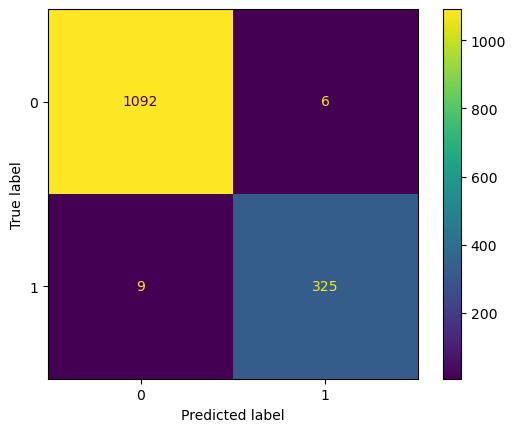

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

import matplotlib.pyplot as plt

y_pred = nb_model.predict(vectorizer.transform(X_test))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### ROC Curve

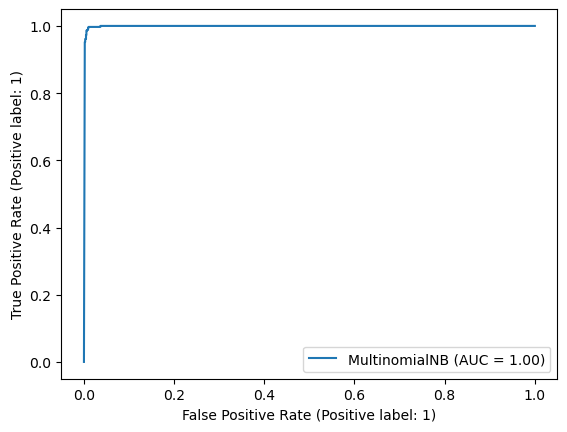

In [8]:
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt

fig = RocCurveDisplay.from_estimator(nb_model, vectorizer.transform(X_test), y_test)
plt.show()

### Precision and Recall

In [9]:
tn, fp, fn, tp = cm.ravel()
nb_perf = pd.DataFrame.from_dict(
    {
        "Classifier": "Naive Bayes",
        "Accuracy": 100 * sum(predictions == y_test) / len(predictions),
        "Sensitivity/Recall": [tp / (tp + fn)],
        "Specificity": [tn / (fp + tn)],
        "Precision": [tp / (tp + fp)],
    }
)
nb_perf

,Classifier,Accuracy,Sensitivity/Recall,Specificity,Precision
0,Naive Bayes,98.952514,0.973054,0.994536,0.981873


# Method 2: Support Vector Machine (SVM)

In [10]:
from sklearn.svm import SVC

svm_model = SVC(kernel="linear", random_state=0)
svm_model.fit(X_train_vectorized, y_train)
predictions = svm_model.predict(vectorizer.transform(X_test))

## Performance Metrics

### Confusion Matrix

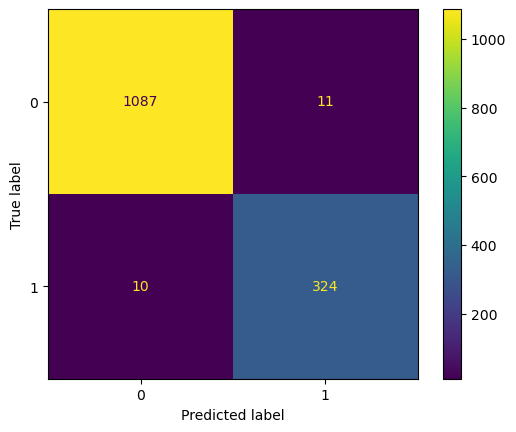

In [11]:
y_pred = svm_model.predict(vectorizer.transform(X_test))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### ROC Curve

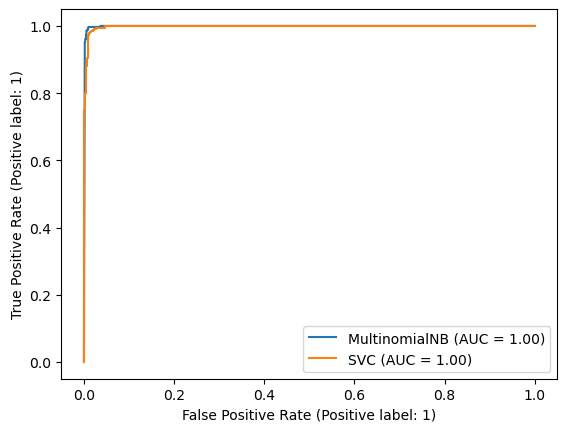

In [12]:
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt

fig = RocCurveDisplay.from_estimator(nb_model, vectorizer.transform(X_test), y_test)
fig = RocCurveDisplay.from_estimator(
    svm_model, vectorizer.transform(X_test), y_test, ax=fig.ax_
)
plt.show()

### Precision and Recall

In [13]:
tn, fp, fn, tp = cm.ravel()

svm_perf = pd.DataFrame.from_dict(
    {
        "Classifier": "SVM",
        "Accuracy": 100 * sum(predictions == y_test) / len(predictions),
        "Sensitivity/Recall": [tp / (tp + fn)],
        "Specificity": [tn / (fp + tn)],
        "Precision": [tp / (tp + fp)],
    }
)
pd.concat([nb_perf, svm_perf])

,Classifier,Accuracy,Sensitivity/Recall,Specificity,Precision
0,Naive Bayes,98.952514,0.973054,0.994536,0.981873
0,SVM,98.533520,0.970060,0.989982,0.967164


# Method 3: K-Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_vectorized, y_train)
predictions = knn_model.predict(vectorizer.transform(X_test))

## Performance Metrics

### Confusion Matrix

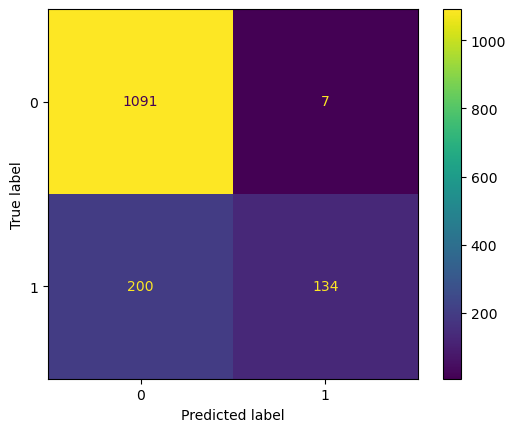

In [15]:
y_pred = knn_model.predict(vectorizer.transform(X_test))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### ROC Curve

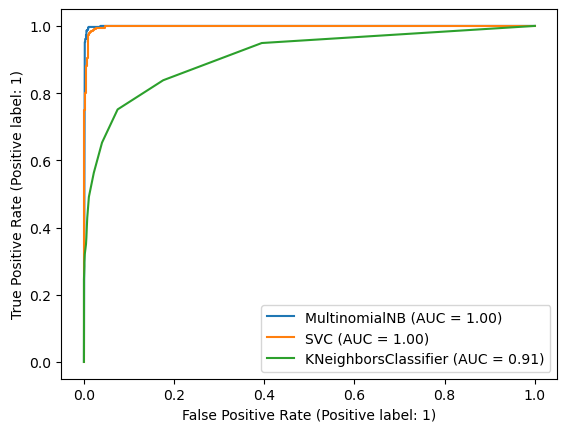

In [16]:
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt

fig = RocCurveDisplay.from_estimator(nb_model, vectorizer.transform(X_test), y_test)
fig = RocCurveDisplay.from_estimator(
    svm_model, vectorizer.transform(X_test), y_test, ax=fig.ax_
)
fig = RocCurveDisplay.from_estimator(
    knn_model, vectorizer.transform(X_test), y_test, ax=fig.ax_
)
plt.show()

### Precision and Recall

In [17]:
tn, fp, fn, tp = cm.ravel()

knn_perf = pd.DataFrame.from_dict(
    {
        "Classifier": "KNN",
        "Accuracy": 100 * sum(predictions == y_test) / len(predictions),
        "Sensitivity/Recall": [tp / (tp + fn)],
        "Specificity": [tn / (fp + tn)],
        "Precision": [tp / (tp + fp)],
    }
)
pd.concat([nb_perf, svm_perf, knn_perf])

,Classifier,Accuracy,Sensitivity/Recall,Specificity,Precision
0,Naive Bayes,98.952514,0.973054,0.994536,0.981873
0,SVM,98.533520,0.970060,0.989982,0.967164
0,KNN,85.544693,0.401198,0.993625,0.950355


# Real World Test

Just for fun, I collected some actual spam from my phone text messages and some actual emails I received to see how our models perform in classifying them

In [18]:
with open("messages.txt") as f:
    messages = f.readlines()

classifiers = {
    "Naive Bayes": nb_model,
    "SVM": svm_model,
    "KNN": knn_model,
}

results = pd.DataFrame.from_dict(
    {
        name: [
            "spam" if result else "not spam"
            for result in classifier.predict(vectorizer.transform(messages))
        ]
        for name, classifier in classifiers.items()
    }
)
results.insert(0, "message", [message[:40] for message in messages], True)
results

,message,Naive Bayes,SVM,KNN
0,"<C h a s e> For your security, we have t",spam,spam,not spam
1,<#>B0A- We have rejected a request autho,spam,not spam,not spam
2,"HUGE SAVINGS!!! Life insurance, Final Ex",spam,not spam,not spam
3,Wanna be an entrepreneur? Tired of yout,spam,spam,not spam
4,Visa Processing Alerts! Your BOA EDD Pre,spam,not spam,not spam
5,Jaylen.. Remember me? Its Rylee! We made,spam,not spam,not spam
6,[US-PS] We cannot deliver your package d,spam,not spam,not spam
7,Y.our paymen.t for last mo.nth was recei,spam,not spam,not spam
8,The Chancellor's Doctoral Incentive Prog,not spam,not spam,not spam
9,Good day! Thank you for expressing inter,not spam,not spam,not spam


Oddly enough, despite the KNN having an 87% accuracy with our testing dataset, it was not able to flag any of my real world spam messages as spam and the Naive Bayes classifier was able to correctly classify all messages

# Conclusion

Based on our performance analysis of these 3 classifiers, we see that in this case specifically the Naive Bayes classifier outperforms both the SVM and K-Nearest Neighbors classifiers in all metrics including the real world test. SVM however, does have a similarly high accuracy compared to Naive Bayes.